In [35]:
import pandas as pd 
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

file = "business-intelligence-project.xlsx"
data = pd.ExcelFile(file)
print(data.sheet_names) #this returns the all the sheets in the excel file

['Task 1', 'Task 1_cleaned', 'Task 2', 'Task 2_cleaned', 'Task 3', 'Task 3_cleaned']


# Task 1

In [36]:
df1 = data.parse("Task 1_cleaned")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee ID  60 non-null     int64  
 1   Sales        60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [37]:
df1.head(10)

,Employee ID,Sales
0,1001,482.660296
1,1002,3353.827431
2,1003,8716.268720
3,1004,5268.511955
4,1005,5272.372750
5,1006,4521.799891
6,1007,339.079381
7,1008,2498.285741
8,1009,4300.096754
9,1010,3531.549682


In [38]:
data_mean = st.mean(df1.Sales)
data_median = st.median(df1.Sales)
data_mode = st.mode(df1.Sales)
data_max = max(df1.Sales)
data_min = min(df1.Sales)
data_stdev = st.stdev(df1.Sales)
data_skew = skew(df1.Sales)

print ("Mean is :", data_mean)
print ("Median is :", data_median)
print ("Mode is :", data_mode,"This is not exact answer since all the number only appears once")
print ("Maximum Value is :", data_max)
print ("Minimum Value is :", data_min)
print ("Standard Deviation is :", data_stdev)
print ("Skewness is :", data_skew)

Mean is : 4444.581353167947
Median is : 4290.390277792758
Mode is : 482.6602960145865 This is not exact answer since all the number only appears once
Maximum Value is : 9676.027108133301
Minimum Value is : 338.6298319322356
Standard Deviation is : 2689.999286261166
Skewness is : 0.17014577860608798


## Virtrualizaiton the distribution of the sales data

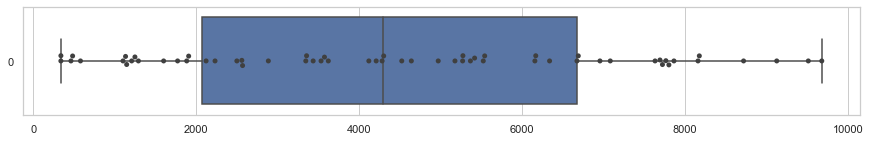

In [39]:
sns.set_theme(style="whitegrid")
plt.figure (figsize=(15,2))

ax = sns.boxplot(orient = "h", data=df1.Sales)
ax = sns.swarmplot(orient = "h",data=df1.Sales, color=".25")

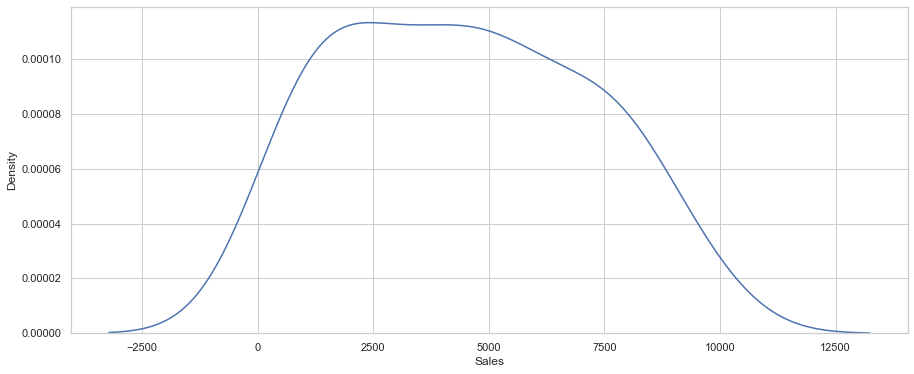

In [40]:
plt.figure (figsize=(15,6))
sns.kdeplot(data=df1.Sales)
plt.show()

#### Conclusion
From the calculations and two charts above, we can see the spread from 338.6 to 9676

The mean is 4444.58

skewness is 0.17

As a company, it means more than half of the employees's sales are below average, which require more attention on their performance; and less than half of employees total contribute more than half of the sales, which need to keep up.

# Task 2

In [41]:
df2 = data.parse("Task 2_cleaned")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Store Name                           30 non-null     object 
 1   Number of Customer Made a Purchased  30 non-null     float64
 2   Total Number of Customer Visited     30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 848.0+ bytes


In [42]:
df2.head(10)

,Store Name,Number of Customer Made a Purchased,Total Number of Customer Visited
0,Store 1,800.000000,7460.773582
1,Store 2,650.000000,1951.818302
2,Store 3,544.000000,4377.379323
3,Store 4,825.194161,5501.294408
4,Store 5,157.186864,1209.129724
5,Store 6,978.380425,5755.178968
6,Store 7,575.353047,3196.405816
7,Store 8,385.632772,1542.531087
8,Store 9,720.843907,6553.126431
9,Store 10,688.664979,5738.874824


In [43]:
df2["Customer Conversion Rate"] = df2["Number of Customer Made a Purchased"]/df2["Total Number of Customer Visited"]
df2.head()

,Store Name,Number of Customer Made a Purchased,Total Number of Customer Visited,Customer Conversion Rate
0,Store 1,800.000000,7460.773582,0.107227
1,Store 2,650.000000,1951.818302,0.333023
2,Store 3,544.000000,4377.379323,0.124275
3,Store 4,825.194161,5501.294408,0.150000
4,Store 5,157.186864,1209.129724,0.130000


In [44]:
data_mean = st.mean(df2["Customer Conversion Rate"])
data_median = st.median(df2["Customer Conversion Rate"])
data_mode = st.multimode(df2["Customer Conversion Rate"])
data_range = max(df2["Customer Conversion Rate"])-min(df2["Customer Conversion Rate"])
data_stdev = st.stdev(df2["Customer Conversion Rate"])

print ("Mean is :", data_mean)
print ("Median is :", data_median)
print ("Mode is :", data_mode)
print ("Range(max-min) is :", data_range)
print ("Standard Deviation is :", data_stdev)

Mean is : 0.16816762024029097
Median is : 0.1275
Mode is : [0.18, 0.25, 0.12, 0.19]
Range(max-min) is : 0.2867797876971312
Standard Deviation is : 0.08102405976755989


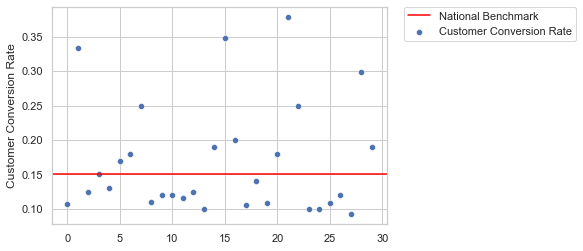

In [64]:
graph = sns.scatterplot(data=df2["Customer Conversion Rate"],label="Customer Conversion Rate")
graph.axhline(0.15,color="red",label="National Benchmark")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

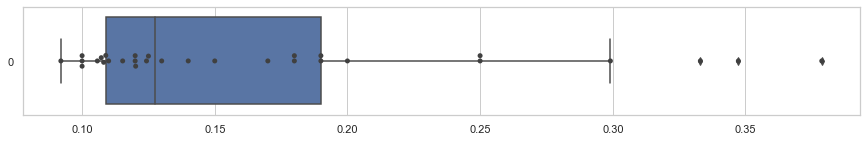

In [61]:
sns.set_theme(style="whitegrid")
plt.figure (figsize=(15,2))

ax = sns.boxplot(orient = "h", data=df2["Customer Conversion Rate"])
ax = sns.swarmplot(orient = "h",data=df2["Customer Conversion Rate"], color=".25")

#### Conclusion
From the plot above, we can tell that the company is not proformce very well. 

The median is only 0.1275 which indicating that among all the stores, more than half of the store are below national benchmark.

## Task 3

In [47]:
df3 = data.parse("Task 3_cleaned")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50 non-null     int64  
 1   Ice Crem Sale (X)    50 non-null     int64  
 2   Sunglasses Sold (Y)  50 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [48]:
df3.head(10)

,ID,Ice Crem Sale (X),Sunglasses Sold (Y)
0,1,52,36.40
1,2,53,47.70
2,3,54,48.60
3,4,55,49.50
4,5,56,50.40
5,6,57,48.45
6,7,57,48.45
7,8,59,50.15
8,9,60,54.00
9,10,60,54.00


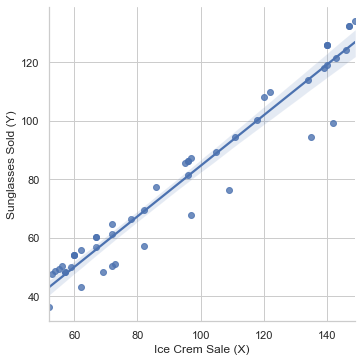

In [49]:
x = df3["Ice Crem Sale (X)"]
y = df3["Sunglasses Sold (Y)"]

sns.lmplot(x="Ice Crem Sale (X)", y="Sunglasses Sold (Y)", data=df3)
plt.show()

#### Method 1

In [50]:
np.corrcoef(df3["Ice Crem Sale (X)"], df3["Sunglasses Sold (Y)"])

array([[1.        , 0.97033989],
       [0.97033989, 1.        ]])

#### Method 2

In [51]:
df3["Ice Crem Sale (X)"].corr(df3["Sunglasses Sold (Y)"])

0.9703398902949367

In [52]:
df3["Sunglasses Sold (Y)"].corr(df3["Ice Crem Sale (X)"])

0.9703398902949368

#### Method 3

In [53]:
df3.corr()

,ID,Ice Crem Sale (X),Sunglasses Sold (Y)
ID,1.000000,0.979811,0.942605
Ice Crem Sale (X),0.979811,1.000000,0.970340
Sunglasses Sold (Y),0.942605,0.970340,1.000000


#### Method 4

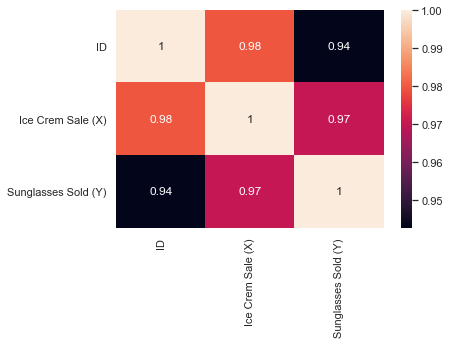

In [54]:
sns.heatmap(df3.corr(),annot=True);

#### Conclusion
the Ice cream sales and Sanglasses sold are positive correlated, and the correlation coefficient is about 0.97.

But positive correlation doesn't mean causation, a controlled study is usually the effective way to determine causation.

In this case, the causation for both sales increase at same time is most likely the high temperature / hot weather.